In [1]:
import pandas as pd
import ast
import os
from dotenv import load_dotenv
from openai import OpenAI
import pandas as pd

load_dotenv()
API_KEY = os.getenv('API_KEY')

df = pd.read_csv('27-oct-extracted.csv')
kw = df['keywords'].to_list()
kw = [ast.literal_eval(items) for items in kw]
kw = [item for sublist in kw for item in sublist]
kw_set = set(kw)

In [2]:
count_kw = {}

for i, item in enumerate(kw):
    if item in count_kw:
        count_kw[item] += 1
    else:
        count_kw[item] = 1
        
count_kw

{'Theory of Mind': 2,
 'Human-AI Interaction': 28,
 'Social Intelligence': 1,
 'User Experience': 41,
 'Design Guidelines': 8,
 'User Values': 1,
 'Prayer Experiences': 1,
 'Clinical Decision-Making': 2,
 'Patient-Centered Care': 1,
 'AI Interaction Models': 1,
 'Explainable AI': 31,
 'Trust Formation': 1,
 'Human-AI Interactions': 2,
 'User Burden': 1,
 'Sexual Assault Reporting': 1,
 'Algorithmic Evaluation Resistance': 1,
 'Appropriate Trust': 2,
 'Research Opportunities': 2,
 'Inclusivity': 2,
 'Problem-solving diversity': 1,
 'Demographic diversity': 1,
 'Interaction Paradigms': 1,
 'System Design': 1,
 'Music Application': 1,
 'User Needs': 2,
 'Human-AI Collaboration': 34,
 'Placebo Effect': 2,
 'User Studies': 1,
 'Artificial Intelligence': 3,
 'Mind Perception': 1,
 'Design Solutions': 1,
 'AI Systems Understanding': 1,
 'Game-Based Learning': 2,
 'User Mental Models': 1,
 'User Interface Design': 4,
 'Ecological Thinking': 1,
 'Sustainable Future': 1,
 'Decision Making': 9,
 

In [3]:
embedding = {}

openai_key = ""
from openai import OpenAI
client = OpenAI(api_key=API_KEY)

def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding


In [4]:
import concurrent.futures
from typing import Set, Dict, Any

def process_item(item: str) -> tuple[str, Any]:
    print()
    embedding = get_embedding(item)
    return (item, embedding)

def get_concurrent_embeddings(kw_set: Set[str], max_workers: int = 5) -> Dict[str, Any]:
    embeddings = {}
    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_item = {
            executor.submit(process_item, item): item 
            for item in kw_set
        }
        
        for future in concurrent.futures.as_completed(future_to_item):
            try:
                item, embedding = future.result()
                embeddings[item] = embedding
            except Exception as e:
                print(f"Error processing {future_to_item[future]}: {str(e)}")
    
    return embeddings

embedding = get_concurrent_embeddings(kw_set)

Processing item: Stakeholder Influence
Processing item: Self-Reflection
Processing item: Security Operations Centres
Processing item: User Interface
Processing item: Virtual Environment
Processing item: User Evaluation
Processing item: Teaming Perception
Processing item: Radiology
Processing item: Programming Interactions
Processing item: Physical Intelligibility
Processing item: Smart Home
Processing item: Design Education
Processing item: User perception
Processing item: Concept Induction
Processing item: System Design
Processing item: Audience Engagement
Processing item: Medical Diagnosis
Processing item: Text Recommendation
Processing item: Audio-Visual Learning
Processing item: Command Customization
Processing item: Social and Ethical Risks
Processing item: Polyp Detection
Processing item: AI Writing Tools
Processing item: Educational Technology
Processing item: Design Framework
Processing item: Research themes
Processing item: Complexity Methods
Processing item: Data Analytics
Pr

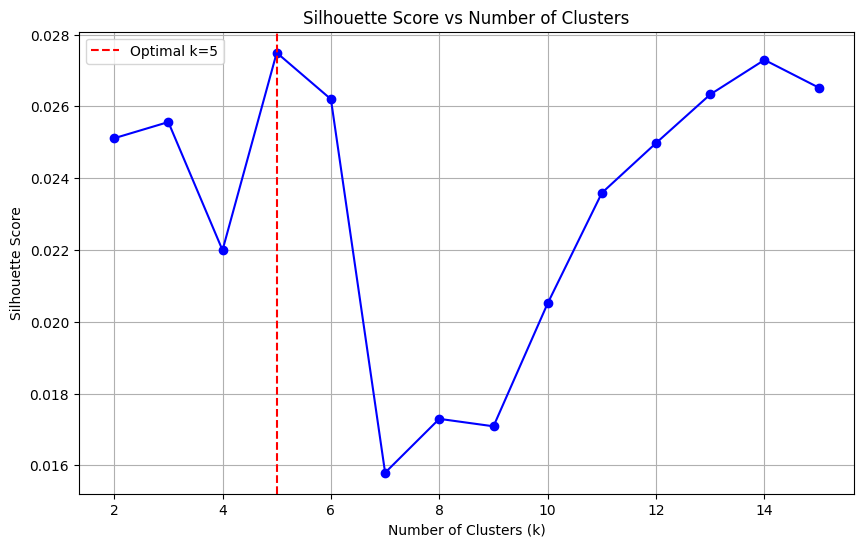

Optimal number of clusters: 5


/Users/chayapatr/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


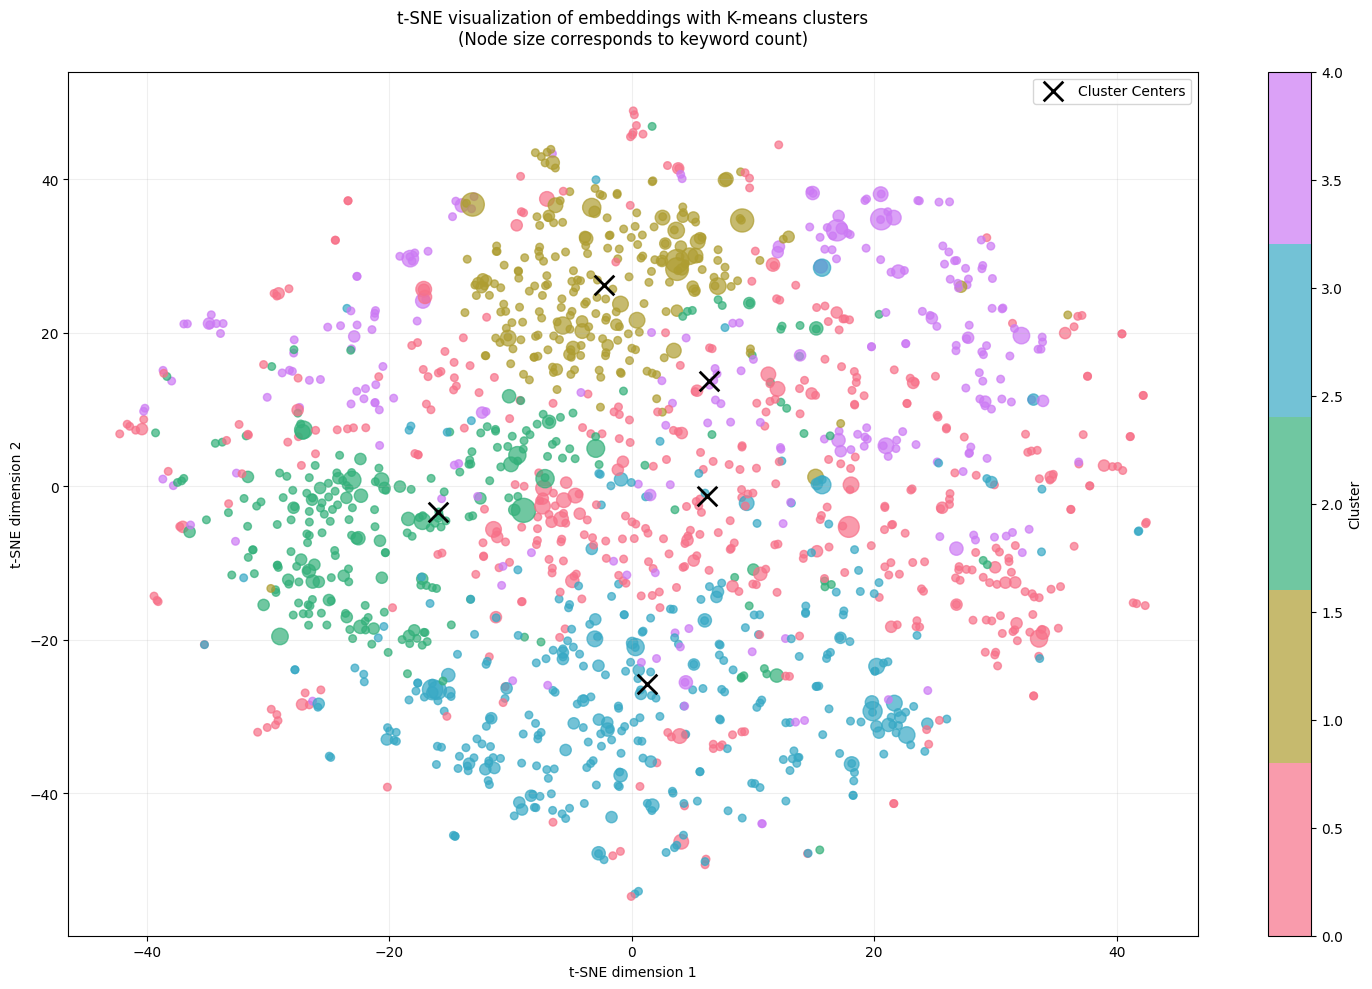

Virtual Environment: Cluster 0
Stakeholder Influence: Cluster 3
User Interface: Cluster 2
Teaming Perception: Cluster 3
Self-Reflection: Cluster 3
User Evaluation: Cluster 0
Radiology: Cluster 0
Security Operations Centres: Cluster 0
Physical Intelligibility: Cluster 4
Programming Interactions: Cluster 2
Smart Home: Cluster 0
Design Education: Cluster 2
User perception: Cluster 3
Concept Induction: Cluster 4
System Design: Cluster 2
Medical Diagnosis: Cluster 0
Text Recommendation: Cluster 4
Command Customization: Cluster 0
Audio-Visual Learning: Cluster 0
Social and Ethical Risks: Cluster 3
Polyp Detection: Cluster 4
Audience Engagement: Cluster 0
AI Writing Tools: Cluster 1
Educational Technology: Cluster 0
Design Framework: Cluster 2
Data Analytics: Cluster 4
Teenagers: Cluster 0
Complexity Methods: Cluster 4
Research themes: Cluster 3
Task Learning: Cluster 4
Diagnostic Utility: Cluster 0
Scoping Review: Cluster 0
Continuous Interaction: Cluster 2
Human-Autonomy Teams: Cluster 1
So

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
from matplotlib.colors import ListedColormap

def prepare_embedding_data(
    embeddings: Dict[str, List[float]], 
    kw_count: Dict[str, int]
) -> Tuple[np.ndarray, List[str], np.ndarray]:
    """
    Convert dictionary of embeddings to numpy array and prepare node sizes
    """
    keys = list(embeddings.keys())
    embedding_matrix = np.array([embeddings[k] for k in keys])
    
    # Get counts and normalize them for visualization
    counts = np.array([kw_count.get(k, 1) for k in keys])
    # More aggressive log scaling for better size differentiation
    node_sizes = 50 * (1 + np.log1p(counts))  # Reduced base size and using log1p
    
    return embedding_matrix, keys, node_sizes

def find_optimal_clusters(
    embedding_matrix: np.ndarray, 
    min_clusters: int = 2,
    max_clusters: int = 15  # Reduced from 27
) -> int:
    """
    Find optimal number of clusters using silhouette score with early stopping
    """
    silhouette_scores = []
    k_values = range(min_clusters, max_clusters + 1)
    
    best_score = -1
    n_clusters = min_clusters
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(embedding_matrix)
        silhouette_avg = silhouette_score(embedding_matrix, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        
        # Update best score if current score is better
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            n_clusters = k
    
    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, silhouette_scores, 'bo-')
    plt.axvline(x=n_clusters, color='r', linestyle='--', label=f'Optimal k={n_clusters}')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return n_clusters

def analyze_embeddings(
    embeddings: Dict[str, List[float]], 
    kw_count: Dict[str, int],
    perplexity: int = 50,  # Increased from 30
    learning_rate: float = 200.0,  # Added learning rate parameter
    n_iter: int = 1000,  # Increased number of iterations
    random_state: int = 42,
    min_node_size: float = 30,  # Reduced from 50
    max_node_size: float = 300,  # Reduced from 500
    label_threshold: int = None
) -> Dict[str, object]:
    """
    Perform improved K-means clustering and t-SNE visualization
    """
    # Prepare data
    embedding_matrix, keys, node_sizes = prepare_embedding_data(embeddings, kw_count)
    
    # Scale node sizes
    node_sizes = min_node_size + (node_sizes - node_sizes.min()) * \
                 (max_node_size - min_node_size) / (node_sizes.max() - node_sizes.min())
    
    # Find optimal number of clusters
    n_clusters = find_optimal_clusters(embedding_matrix)
    print(f"Optimal number of clusters: {n_clusters}")
    
    # Perform k-means clustering with multiple initializations
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    cluster_labels = kmeans.fit_predict(embedding_matrix)
    
    # Perform t-SNE with improved parameters
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        n_iter=n_iter,
        random_state=random_state
    )
    tsne_embeddings = tsne.fit_transform(embedding_matrix)
    
    # Create visualization with improved styling
    plt.figure(figsize=(15, 10))
    
    # Use a more distinct color palette
    colors = sns.color_palette('husl', n_clusters)
    
    # Create scatter plot
    scatter = plt.scatter(
        tsne_embeddings[:, 0],
        tsne_embeddings[:, 1],
        c=cluster_labels,
        s=node_sizes,
        cmap=ListedColormap(colors),
        alpha=0.7  # Slightly increased opacity
    )
    
    # Add cluster centers
    cluster_centers = np.array([
        np.mean(tsne_embeddings[cluster_labels == i], axis=0)
        for i in range(n_clusters)
    ])
    
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        c='black',
        s=200,
        marker='x',
        linewidths=2,
        label='Cluster Centers'
    )
    
    plt.colorbar(scatter, label='Cluster')
    plt.title('t-SNE visualization of embeddings with K-means clusters\n'
             '(Node size corresponds to keyword count)', pad=20)
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.legend()
    
    # Add grid for better readability
    plt.grid(True, alpha=0.2)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'cluster_labels': cluster_labels,
        'tsne_embeddings': tsne_embeddings,
        'n_clusters': n_clusters,
        'keys': keys,
        'node_sizes': node_sizes
    }
    
    
results = analyze_embeddings(embedding, count_kw)
    
# Print cluster assignments
for key, cluster in zip(results['keys'], results['cluster_labels']):
    print(f"{key}: Cluster {cluster}")

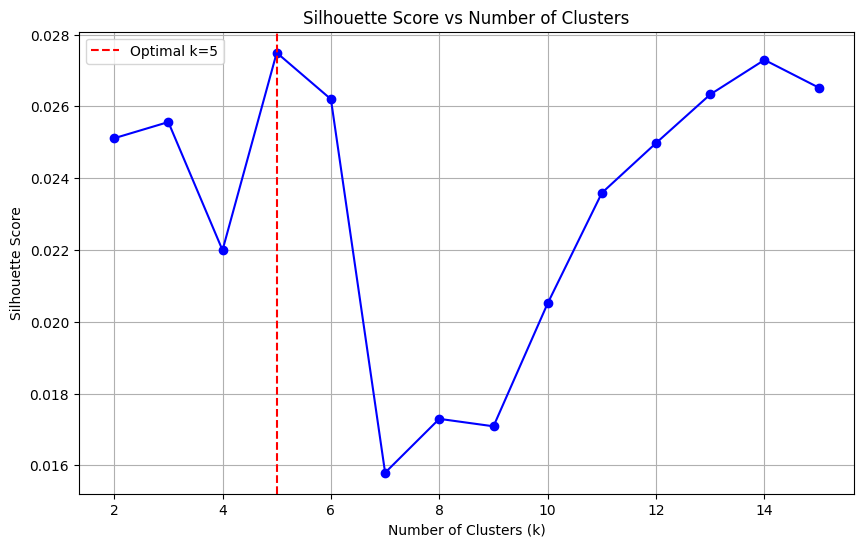

Optimal number of clusters: 5


/Users/chayapatr/.venv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


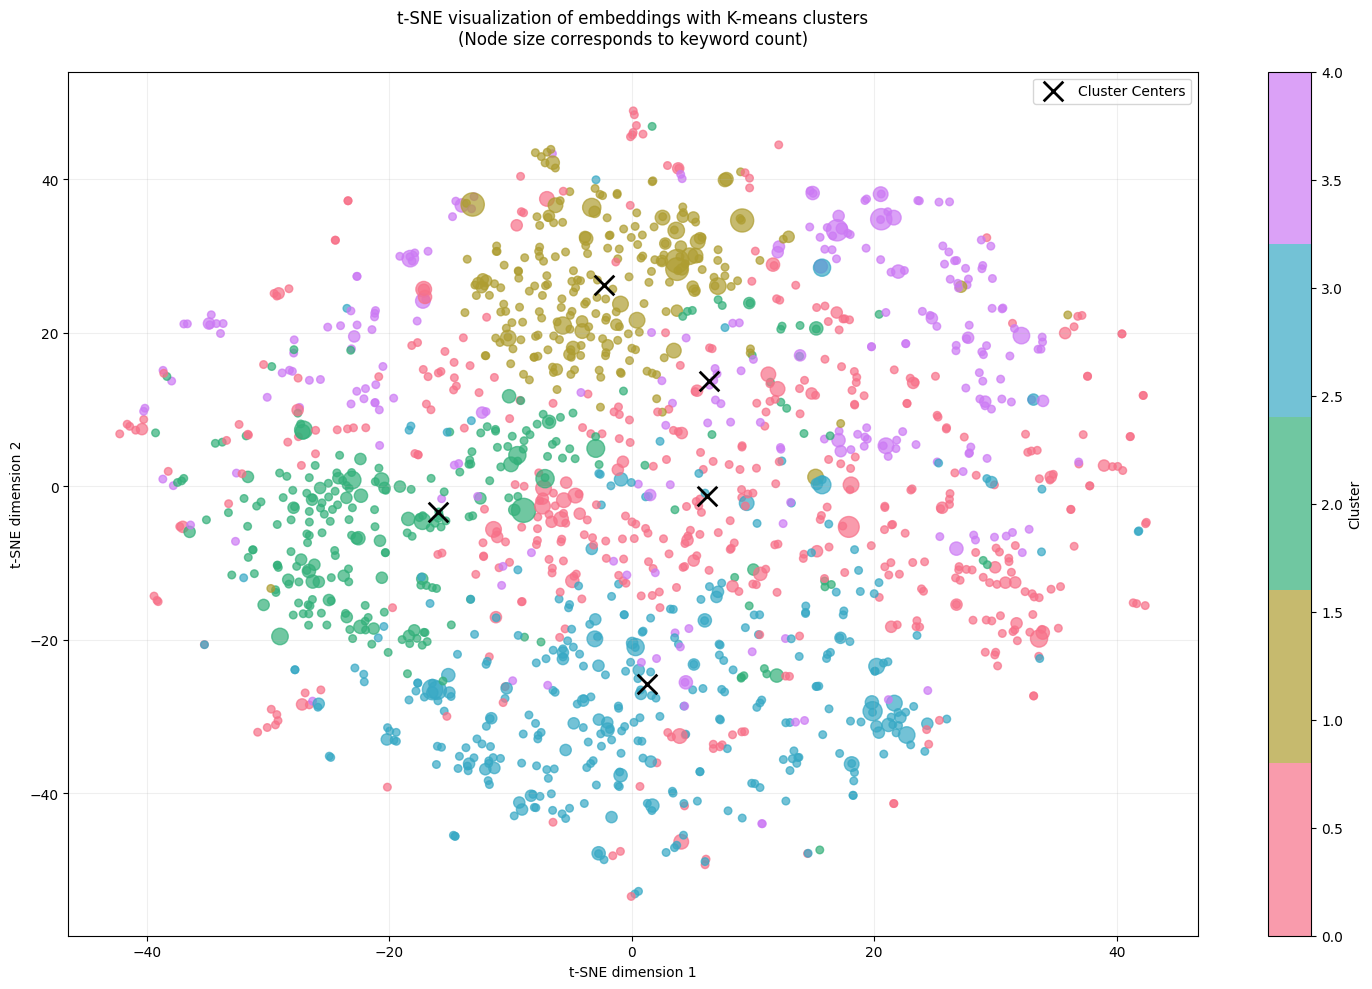


Cluster Analysis Summary:

Cluster 0
----------------------------------------
Size: 471 keywords
Total mentions: 582

Top keywords (with counts):
  • Healthcare                         17
  • Education                           7
  • Accessibility                       5
  • User Control                        5
  • Clinical Decision Support           5
  • User Understanding                  5
  • HCI Research                        5
  • Older Adults                        4
  • Virtual Reality                     4
  • User Engagement                     4

Cluster 3
----------------------------------------
Size: 343 keywords
Total mentions: 473

Top keywords (with counts):
  • Decision-Making                    15
  • User Trust                         11
  • Decision Making                     9
  • Transparency                        8
  • Explainability                      7
  • User Perception                     7
  • Trust                               6
  • Trust Calibrati

In [6]:
def analyze_clusters(
    keys: List[str],
    cluster_labels: np.ndarray,
    kw_count: Dict[str, int],
    top_n: int = 10
) -> Dict[int, Dict[str, List]]:
    """
    Analyze clusters to extract most common and significant keywords.
    
    Args:
        keys: List of keywords
        cluster_labels: Array of cluster assignments
        kw_count: Dictionary of keyword counts
        top_n: Number of top keywords to extract per cluster
        
    Returns:
        Dictionary mapping cluster IDs to their analysis results
    """
    n_clusters = len(set(cluster_labels))
    cluster_analysis = {}
    
    for cluster_id in range(n_clusters):
        # Get keywords in this cluster
        cluster_mask = cluster_labels == cluster_id
        cluster_keywords = np.array(keys)[cluster_mask]
        
        # Get counts for keywords in this cluster
        cluster_counts = [kw_count.get(kw, 0) for kw in cluster_keywords]
        
        # Sort keywords by count
        sorted_indices = np.argsort(cluster_counts)[::-1]
        top_keywords = cluster_keywords[sorted_indices][:top_n]
        top_counts = np.array(cluster_counts)[sorted_indices][:top_n]
        
        # Store analysis results
        cluster_analysis[cluster_id] = {
            'size': int(np.sum(cluster_mask)),  # Total keywords in cluster
            'keywords': list(top_keywords),
            'counts': list(top_counts),
            'total_mentions': sum(cluster_counts)
        }
    
    return cluster_analysis

def print_cluster_summary(cluster_analysis: Dict[int, Dict[str, List]]):
    """
    Print a formatted summary of cluster analysis results.
    
    Args:
        cluster_analysis: Output from analyze_clusters function
    """
    # Sort clusters by size
    sorted_clusters = sorted(
        cluster_analysis.items(), 
        key=lambda x: x[1]['total_mentions'], 
        reverse=True
    )
    
    print("\nCluster Analysis Summary:")
    print("=" * 80)
    
    for cluster_id, data in sorted_clusters:
        print(f"\nCluster {cluster_id}")
        print("-" * 40)
        print(f"Size: {data['size']} keywords")
        print(f"Total mentions: {data['total_mentions']}")
        print("\nTop keywords (with counts):")
        
        # Print keywords and their counts in a formatted way
        for kw, count in zip(data['keywords'], data['counts']):
            print(f"  • {kw:<30} {count:>6}")
    
    print("\n" + "=" * 80)

# Example usage:
def analyze_embeddings_with_clusters(
    embeddings: Dict[str, List[float]], 
    kw_count: Dict[str, int],
    top_n: int = 10,
    **kwargs
) -> Dict[str, object]:
    """
    Perform embedding analysis and cluster analysis
    """
    # First perform the regular embedding analysis
    results = analyze_embeddings(embeddings, kw_count, **kwargs)
    
    # Then analyze the clusters
    cluster_analysis = analyze_clusters(
        results['keys'],
        results['cluster_labels'],
        kw_count,
        top_n=top_n
    )
    
    # Print cluster summary
    print_cluster_summary(cluster_analysis)
    
    # Add cluster analysis to results
    results['cluster_analysis'] = cluster_analysis
    
    return results

# Usage example:
results = analyze_embeddings_with_clusters(embedding, count_kw, top_n=10)